In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from pydataset import data
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


from env import get_db_url

iris = data('iris')
iris.columns = [c.lower().replace('.','_') for c in iris]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## I. Iris

In [16]:
iris = data('iris')
iris.columns = [c.lower().replace('.','_') for c in iris]
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


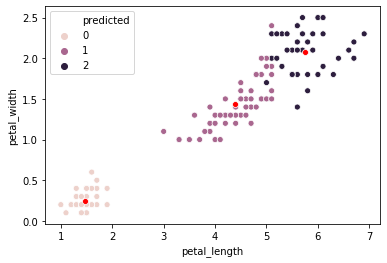

In [34]:
features = iris.drop(columns = 'species').columns.tolist()

kmeans = KMeans(n_clusters = 3,random_state=115)
kmeans.fit(iris.drop(columns = 'species'))
iris['predicted'] = kmeans.predict(iris.drop(columns = 'species'))

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = features)
sns.scatterplot('petal_length', 'petal_width', hue = 'predicted', data = iris )
sns.scatterplot('petal_length', 'petal_width', data = centroids, c=['red'])

In [35]:
iris['encoded_species'] = LabelEncoder().fit_transform(iris.species)

In [38]:
(iris.predicted != iris.encoded_species).sum()

16

## II. Mall Customers

In [5]:
mall = pd.read_sql('select * from customers', get_db_url('mall_customers'))

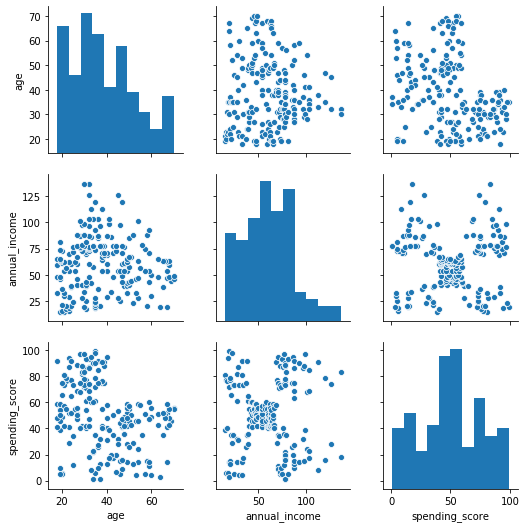

In [6]:
sns.pairplot(mall.drop(columns = 'customer_id'))

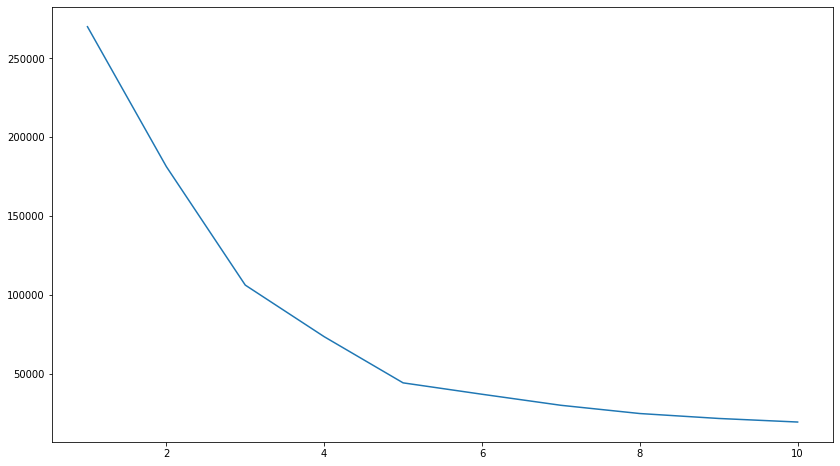

In [7]:
plt.figure(figsize=(14,8))

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall[['annual_income', 'spending_score']])
    inertia.append(kmeans.inertia_)
sns.lineplot(y = inertia, x= range(1,11))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


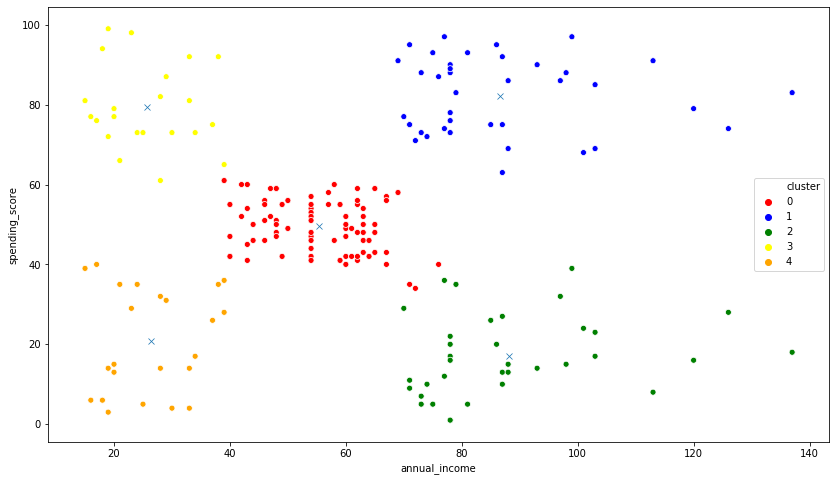

In [8]:
plt.figure(figsize=(14,8))

mall_sub = mall[['annual_income', 'spending_score']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(mall_sub)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = mall_sub.columns.tolist())
sns.scatterplot(x = 'annual_income', y = 'spending_score', data = centroids, marker = 'x')


mall_sub['cluster'] = kmeans.predict(mall_sub).astype(str)
sns.scatterplot(x = 'annual_income', y = 'spending_score', data = mall_sub, hue = 'cluster', palette=['red','blue','green','yellow','orange'])


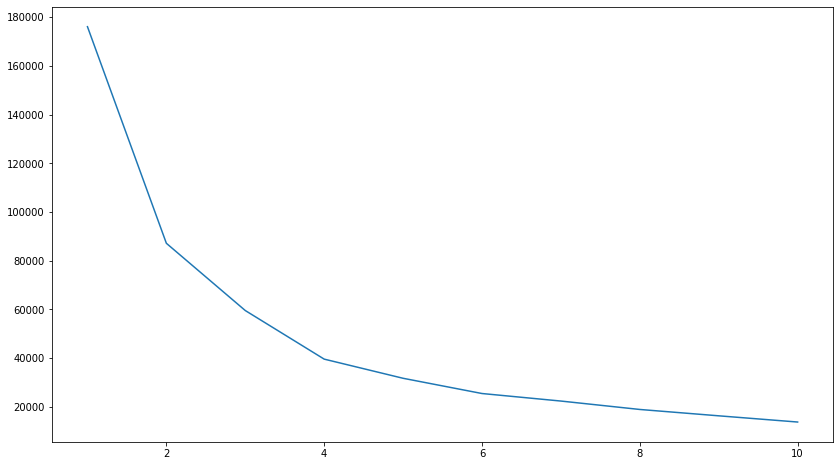

In [9]:
plt.figure(figsize=(14,8))

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall[['annual_income', 'age']])
    inertia.append(kmeans.inertia_)
sns.lineplot(y = inertia, x= range(1,11))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


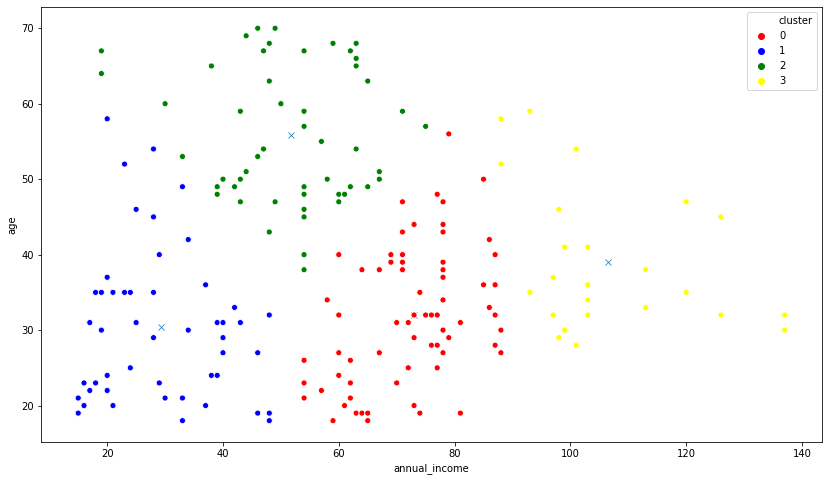

In [10]:
plt.figure(figsize=(14,8))
mall_sub = mall[['annual_income', 'age']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(mall_sub)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = mall_sub.columns.tolist())
sns.scatterplot(x = 'annual_income', y = 'age', data = centroids, marker = 'x')

mall_sub['cluster'] = kmeans.predict(mall_sub).astype(str)
sns.scatterplot(x = 'annual_income', y = 'age', data = mall_sub, hue = 'cluster', palette=['red','blue','green','yellow'])

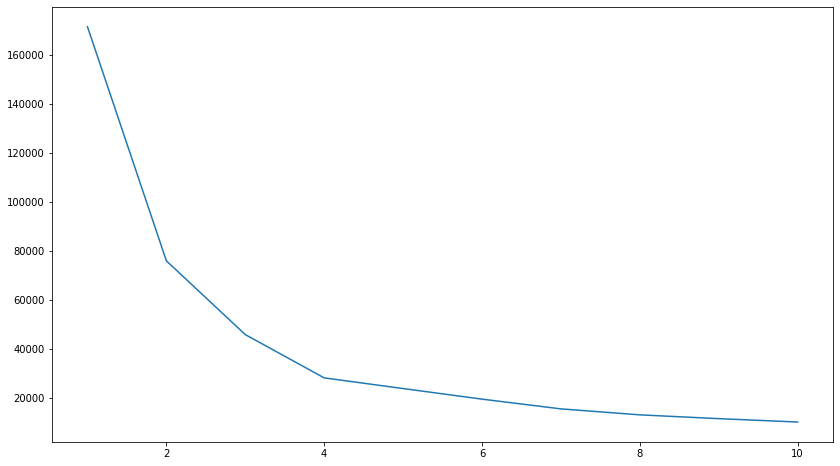

In [11]:
plt.figure(figsize=(14,8))

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall[['age', 'spending_score']])
    inertia.append(kmeans.inertia_)
sns.lineplot(y = inertia, x= range(1,11))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


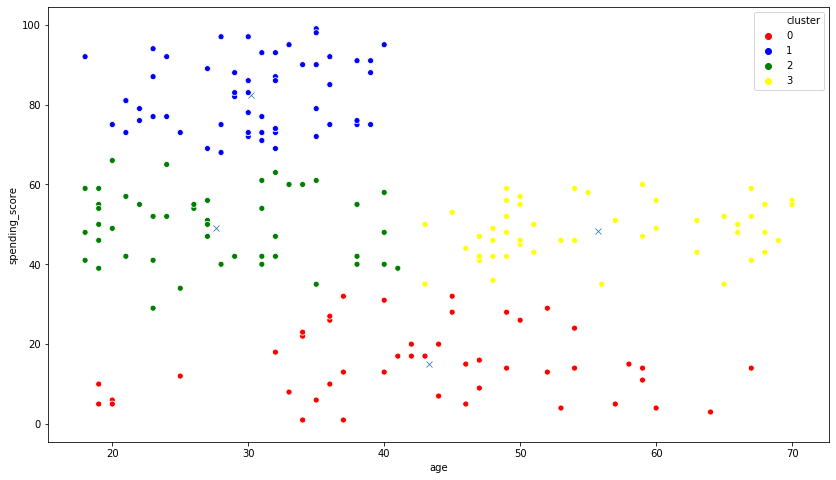

In [12]:
plt.figure(figsize=(14,8))

mall_sub = mall[['age', 'spending_score']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(mall_sub)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns = mall_sub.columns.tolist())
sns.scatterplot(x = 'age', y = 'spending_score', data = centroids, marker = 'x')

mall_sub['cluster'] = kmeans.predict(mall_sub).astype(str)
sns.scatterplot(x = 'age', y = 'spending_score', data = mall_sub, hue = 'cluster', palette=['red','blue','green','yellow'])

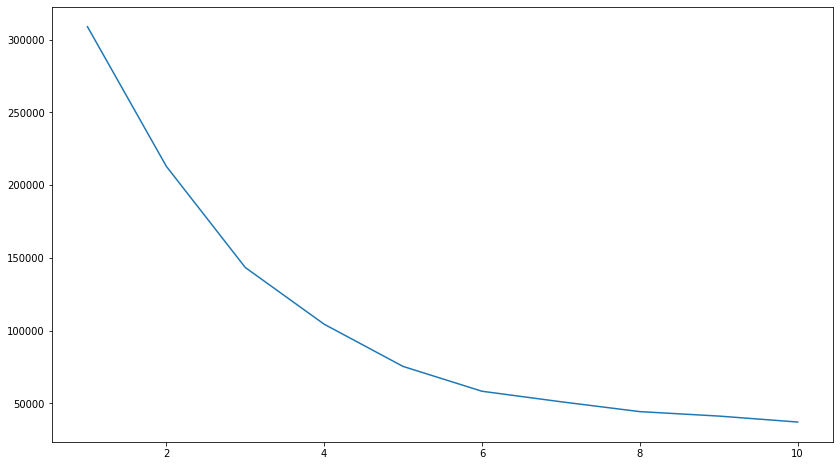

In [13]:
plt.figure(figsize=(14,8))

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall[['age','annual_income', 'spending_score']])
    inertia.append(kmeans.inertia_)
sns.lineplot(y = inertia, x= range(1,11))

In [14]:
kmeans = KMeans(n_clusters=6)
mall_sub = mall.drop(columns = ['customer_id','gender'])
kmeans.fit(mall_sub)
mall_sub['cluster'] = kmeans.predict(mall_sub)
mall_sub.head()


,age,annual_income,spending_score,cluster
0,19,15,39,5
1,21,15,81,0
2,20,16,6,5
3,23,16,77,0
4,31,17,40,5


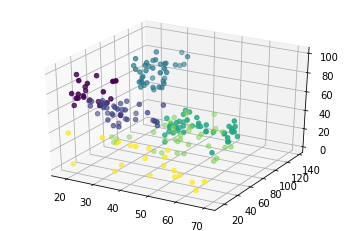

In [46]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D( xs = mall_sub['age'],ys = mall_sub['annual_income'], zs = mall_sub['spending_score'], c = mall_sub.cluster)

## III. Tips

In [42]:
tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


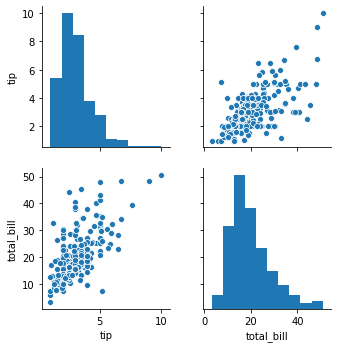

In [43]:
sns.pairplot(tips[['tip', 'total_bill']])

In [57]:
tip_bill = tips[['tip', 'total_bill']]
kmeans_2 = KMeans(n_clusters=2)
kmeans_3 = KMeans(n_clusters=3)
kmeans_2.fit(tip_bill)
kmeans_3.fit(tip_bill)
tip_bill['cluster_2'] = kmeans_2.predict(tip_bill).astype(str)
tip_bill['cluster_3'] = kmeans_3.predict(tip_bill[['tip','total_bill']]).astype(str)
tip_bill.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,tip,total_bill,cluster_2,cluster_3
1,1.01,16.99,1,1
2,1.66,10.34,1,1
3,3.50,21.01,1,0
4,3.31,23.68,0,0
5,3.61,24.59,0,0


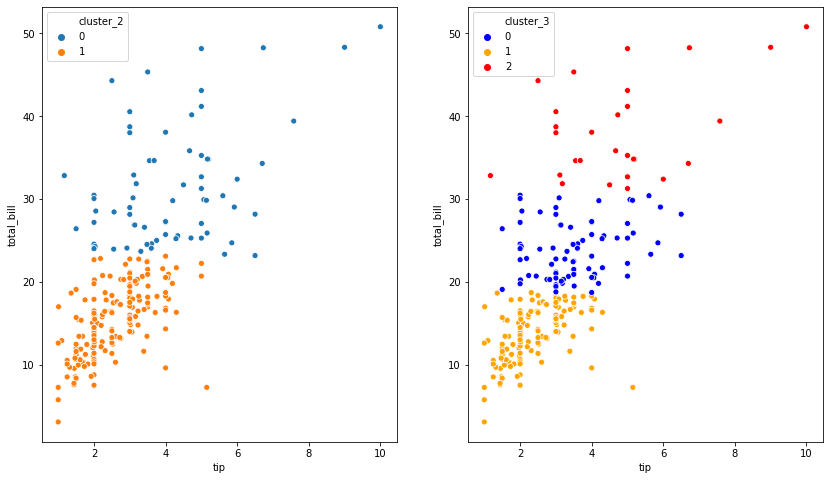

In [64]:
plt.figure(figsize=(14,8))

plt.subplot(121)
sns.scatterplot(x = 'tip', y = 'total_bill', data = tip_bill, hue = 'cluster_2')

plt.subplot(122)
sns.scatterplot(x = 'tip', y = 'total_bill', data = tip_bill, hue = 'cluster_3', palette=['blue','orange','red'])


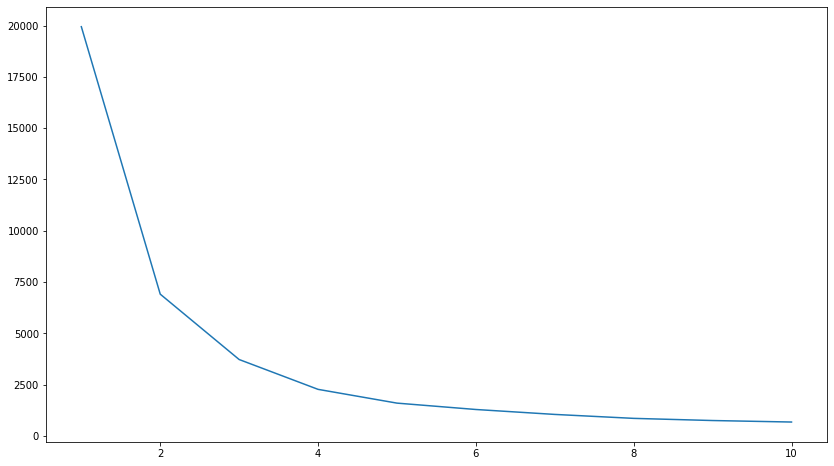

In [66]:
plt.figure(figsize=(14,8))

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tips[['tip','total_bill', 'size']])
    inertia.append(kmeans.inertia_)
sns.lineplot(y = inertia, x= range(1,11))

In [112]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(tips[['tip','total_bill', 'size']])
tips['cluster'] = kmeans.predict(tips[['tip','total_bill', 'size']])


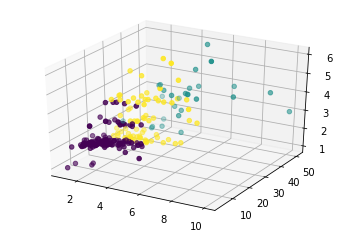

In [113]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D( xs = tips.tip,ys = tips.total_bill,zs = tips['size'], c = tips['cluster'])

In [114]:
tips.size

1952

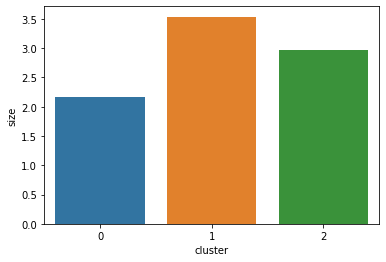

In [116]:
sns.barplot(x = tips.groupby('cluster').mean()['size'].index, y = tips.groupby('cluster').mean()['size'])